Index(['NONE', 'RIGHT_ACCELERATE', 'ACCELERATE', 'LEFT_ACCELERATE'], dtype='object')


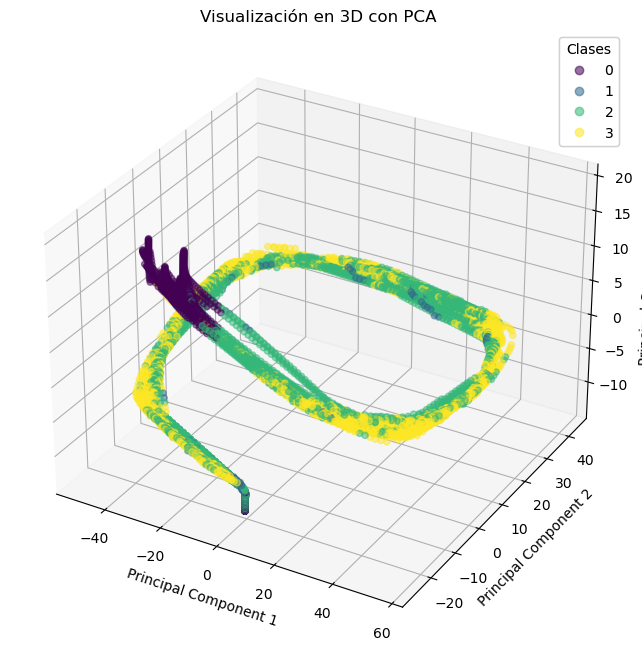

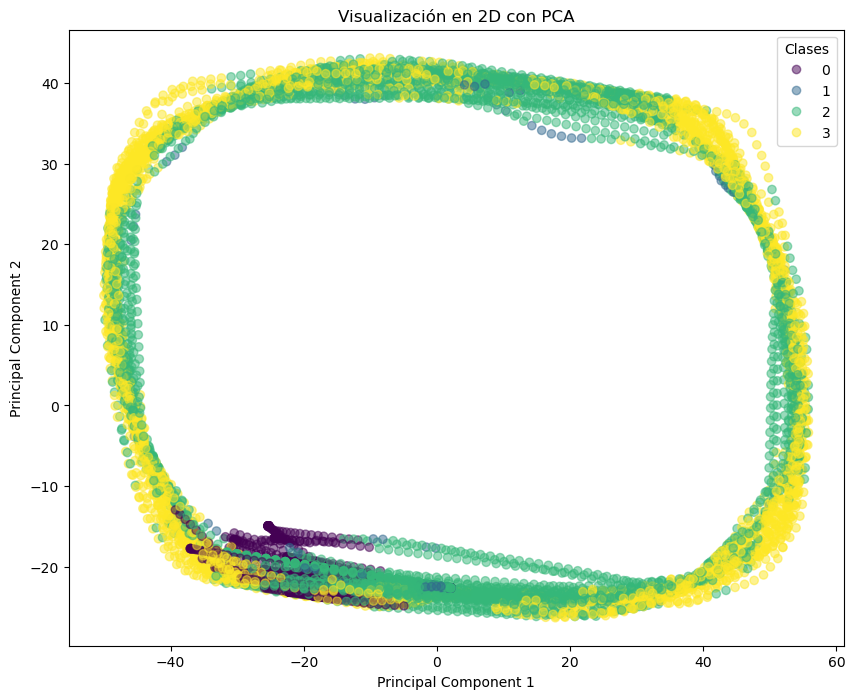

      ray1      ray2      ray3      ray4      ray5     kartx     karty  \
0     -1.0  6.521043  4.611090  6.489725  4.588912  15.98893  0.275615   
1     -1.0  6.520910  4.611073  6.489857  4.588929  15.98893  0.275704   
2     -1.0  6.520908  4.611071  6.489859  4.588931  15.98893  0.275717   
3     -1.0  6.520908  4.611071  6.489859  4.588931  15.98893  0.275722   
4     -1.0  6.520902  4.611067  6.489865  4.588934  15.98893  0.275743   
...    ...       ...       ...       ...       ...       ...       ...   
8367  -1.0  9.904182  6.464934  3.520934  2.811709  14.17850  0.279179   
8368  -1.0  9.797888  6.590121  3.363906  2.686732  14.05399  0.279179   
8369  -1.0  9.651811  6.722738  3.231288  2.554271  13.92251  0.279182   
8370  -1.0  9.467387  6.837092  3.162088  2.417463  13.78766  0.279185   
8371  -1.0  9.274549  6.905004  3.161708  2.317672  13.67316  0.279188   

          kartz       time action  
0      3.105009   0.373333   NONE  
1      3.105008   0.423261   NONE  
2  

In [1]:
import pandas as pd
import glob
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

path = "dataset/raw/"

all_files = glob.glob(os.path.join(path , "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# Seleccionar todas las columnas como características
X = df.drop('action', axis=1)  # Excluir la columna 'action' si es la etiqueta/clase

# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Asignar colores numéricos a cada clase
class_colors, class_labels = pd.factorize(df['action'])

print(class_labels)

# Crear un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=class_colors, cmap='viridis', alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Visualización en 3D con PCA')

# Leyenda
legend = ax.legend(*scatter.legend_elements(), title='Clases')
ax.add_artist(legend)

plt.show()

# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un gráfico bidimensional
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=class_colors, cmap='viridis', alpha=0.5)

# Etiquetas de los ejes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualización en 2D con PCA')

# Leyenda
plt.legend(*scatter.legend_elements(), title='Clases')

plt.show()

print(df)